# Customer Segmentation for E-commerce Marketing

#### Customer Segmentation
Process of dividing a company's customer base into distinct groups or segments that share similar characteristics. The goal is to tailor marketing efforts, product offerings, and services to better meet the needs of each segment. This strategy allows businesses to identify different types of customers and target them more effectively, improving customer satisfaction and increasing sales.

In the context of e-commerce, customer segmentation is particularly important as it enables businesses to optimize their marketing strategies through personalized recommendations, targeted discounts, and relevant promotions. By understanding the varying needs and preferences of customers, e-commerce platforms can enhance user experience and drive sales.

#### Goal
The objective of this project is to segment customers based on purchasing behavior, demographics, and preferences. The desired outcome is to group customers into clusters, such as high-spending, frequent, infrequent, and discount-seeking customers.

For example, frequent buyers may receive loyalty offers, while high-spending customers might be targeted with premium products. Many top e-commerce brands utilize this method to boost sales and increase engagement through loyalty programs, personalized emails, and dynamic website content.

## Step 1: Data Collection

In [7]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [8]:
df = pd.read_csv("customer_segmentation_data.csv")
df[:5]

,id,age,gender,income,spending_score,membership_years,purchase_frequency,preferred_category,last_purchase_amount
0,1,38,Female,99342,90,3,24,Groceries,113.53
1,2,21,Female,78852,60,2,42,Sports,41.93
2,3,60,Female,126573,30,2,28,Clothing,424.36
3,4,40,Other,47099,74,9,5,Home & Garden,991.93
4,5,65,Female,140621,21,3,25,Electronics,347.08


In [9]:
df.shape # (Rows, Cols)

(1000, 9)

In [10]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1000 entries, 0 to 999
Data columns (total 9 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   id                    1000 non-null   int64  
 1   age                   1000 non-null   int64  
 2   gender                1000 non-null   object 
 3   income                1000 non-null   int64  
 4   spending_score        1000 non-null   int64  
 5   membership_years      1000 non-null   int64  
 6   purchase_frequency    1000 non-null   int64  
 7   preferred_category    1000 non-null   object 
 8   last_purchase_amount  1000 non-null   float64
dtypes: float64(1), int64(6), object(2)
memory usage: 70.4+ KB


- Data Completeness: The absence of null values in all columns is a good sign; it means that the dataset is complete and ready for analysis without requiring any imputation for missing data.
- The "gender" & "preferred_category" columns as object types can be treated as categorical variables. Encode these into numerical values before using them in ML algorithms.
- Potential Features for Segmentation: "income", "spending_score", "membership_years", "purchase_frequency" are particularly relevant for customer segmentation.

In [12]:
df["gender"].unique()

array(['Female', 'Other', 'Male'], dtype=object)

In [13]:
df["preferred_category"].unique()

array(['Groceries', 'Sports', 'Clothing', 'Home & Garden', 'Electronics'],
      dtype=object)

## Step 2: Data Preprocessing

### Step 2.1: Data Cleaning

- We will use box plots & IQR method to find outliers. Boxplots & IQR works only for numeric columns.

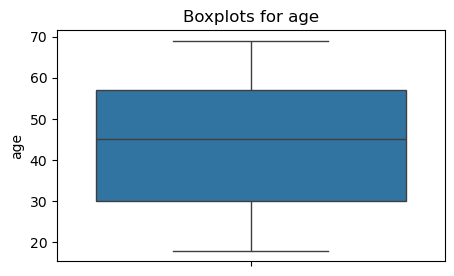

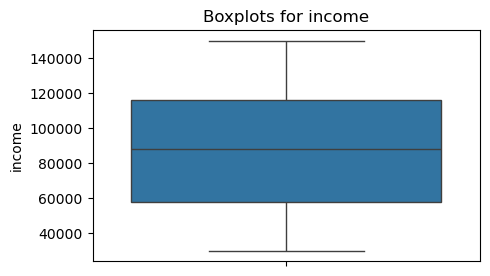

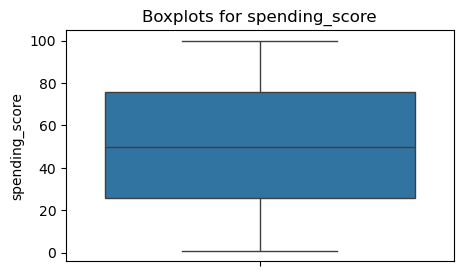

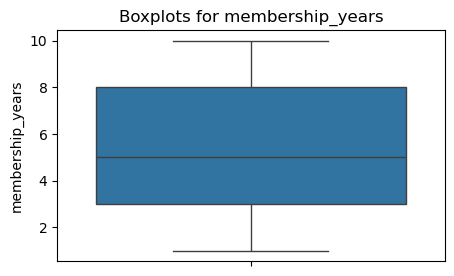

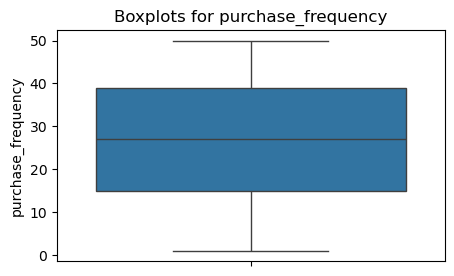

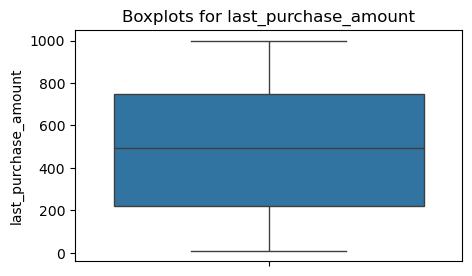

In [17]:
# Boxplot

def boxplots(df, columns):
    for col in columns:
        plt.figure(figsize=(5, 3))
        sns.boxplot(y=df[col])
        plt.title(f"Boxplots for {col}")
        plt.show()

numeric_cols = ['age', 'income', 'spending_score', 'membership_years', 'purchase_frequency', 'last_purchase_amount']
boxplots(df, numeric_cols)

- As we can see there are no outliers in any of our numeric columns, so we don't have to deal with outliers.

In [19]:
# IQR method

def detect_outliers(dataframe, columns):
    for col in columns:
        q1 = dataframe[col].quantile(0.25)
        q3 = dataframe[col].quantile(0.75)
        iqr = q3-q1
        
        lb = q1-1.5*iqr
        ub = q3+1.5*iqr
        
        dataframe[f"{col}_outliers"] = (dataframe[col] < lb) | (dataframe[col] > ub)

check_cols = ["age", "income", "spending_score", "membership_years", "purchase_frequency", "last_purchase_amount"]
detect_outliers(df, check_cols)
df[:1]

,id,age,gender,income,spending_score,membership_years,purchase_frequency,preferred_category,last_purchase_amount,age_outliers,income_outliers,spending_score_outliers,membership_years_outliers,purchase_frequency_outliers,last_purchase_amount_outliers
0,1,38,Female,99342,90,3,24,Groceries,113.53,False,False,False,False,False,False


In [20]:
outliers_cols = [f"{col}_outliers" for col in check_cols]

print("Unique Values:")
for col in outliers_cols:
    print(f"{col}: {df[col].unique()}")

Unique Values:
age_outliers: [False]
income_outliers: [False]
spending_score_outliers: [False]
membership_years_outliers: [False]
purchase_frequency_outliers: [False]
last_purchase_amount_outliers: [False]


- No Outliers Detected: The absence of outliers might suggest that the data is relatively clean and well-distributed.

### Step 2.2: Feature Engineering

In [23]:
# We can drop outliers columns as they are of no use now.

df_cleaned = df.drop(columns=outliers_cols)
df_cleaned[:1]

,id,age,gender,income,spending_score,membership_years,purchase_frequency,preferred_category,last_purchase_amount
0,1,38,Female,99342,90,3,24,Groceries,113.53


In [24]:
# One-hot Encoding for "gender" & "preferred_category"

df_1hot = pd.get_dummies(df_cleaned, columns=['gender', 'preferred_category'], prefix=['gender', 'category'])
df_1hot[:1]

,id,age,income,spending_score,membership_years,purchase_frequency,last_purchase_amount,gender_Female,gender_Male,gender_Other,category_Clothing,category_Electronics,category_Groceries,category_Home & Garden,category_Sports
0,1,38,99342,90,3,24,113.53,True,False,False,False,False,True,False,False


In [25]:
df2 = df_1hot.drop(columns=["id"])
df2[:1]

,age,income,spending_score,membership_years,purchase_frequency,last_purchase_amount,gender_Female,gender_Male,gender_Other,category_Clothing,category_Electronics,category_Groceries,category_Home & Garden,category_Sports
0,38,99342,90,3,24,113.53,True,False,False,False,False,True,False,False


- We will now make certain new columns based on our existing columns for making segmentation easier.

In [27]:
# 1. Age Group (age_group)

def categorize_age(age):
    if age < 18:
        return "Under 18"
    elif age < 25:
        return "18-24"
    elif age < 35:
        return "25-34"
    elif age < 45:
        return "35-44"
    elif age < 55:
        return "45-54"
    elif age < 65:
        return "55-64"
    else:
        return "65 & above"

df2["age_group"] = df2["age"].apply(categorize_age)
df2[:1]

,age,income,spending_score,membership_years,purchase_frequency,last_purchase_amount,gender_Female,gender_Male,gender_Other,category_Clothing,category_Electronics,category_Groceries,category_Home & Garden,category_Sports,age_group
0,38,99342,90,3,24,113.53,True,False,False,False,False,True,False,False,35-44


In [28]:
# 2. Income Category (income_category)

def categorize_income(income):
    if income < 30000:
        return "Low"
    elif income < 70000:
        return "Medium"
    else:
        return "High"

df2["income_category"] = df2["income"].apply(categorize_income)
df2[:1]

,age,income,spending_score,membership_years,purchase_frequency,last_purchase_amount,gender_Female,gender_Male,gender_Other,category_Clothing,category_Electronics,category_Groceries,category_Home & Garden,category_Sports,age_group,income_category
0,38,99342,90,3,24,113.53,True,False,False,False,False,True,False,False,35-44,High


In [29]:
# 3. Spending Efficiency (spending_efficiency)

df2["spending_efficiency"] = df2["spending_score"] / df2["income"]
df2[:1]

,age,income,spending_score,membership_years,purchase_frequency,last_purchase_amount,gender_Female,gender_Male,gender_Other,category_Clothing,category_Electronics,category_Groceries,category_Home & Garden,category_Sports,age_group,income_category,spending_efficiency
0,38,99342,90,3,24,113.53,True,False,False,False,False,True,False,False,35-44,High,0.000906


In [30]:
# 4. Loyalty Score (loyalty_score)

df2["loyalty_score"] = df2["membership_years"] * df2["purchase_frequency"]
df2[:1]

,age,income,spending_score,membership_years,purchase_frequency,last_purchase_amount,gender_Female,gender_Male,gender_Other,category_Clothing,category_Electronics,category_Groceries,category_Home & Garden,category_Sports,age_group,income_category,spending_efficiency,loyalty_score
0,38,99342,90,3,24,113.53,True,False,False,False,False,True,False,False,35-44,High,0.000906,72


In [31]:
# 5. Customer Tenure (tenure_category)

def categorize_tenure(membership_years):
    if membership_years < 1:
        return "New"
    elif membership_years < 3:
        return "Loyal"
    else:
        return "Very Loyal"

df2["tenure_category"] = df2["membership_years"].apply(categorize_tenure)
df2[:1]

,age,income,spending_score,membership_years,purchase_frequency,last_purchase_amount,gender_Female,gender_Male,gender_Other,category_Clothing,category_Electronics,category_Groceries,category_Home & Garden,category_Sports,age_group,income_category,spending_efficiency,loyalty_score,tenure_category
0,38,99342,90,3,24,113.53,True,False,False,False,False,True,False,False,35-44,High,0.000906,72,Very Loyal


In [32]:
# 6. Purchase Frequency Category (purchase_frequency_category)

def categorize_freq(purchase_frequency):
    if purchase_frequency < 5:
        return "Infrequent"
    elif purchase_frequency < 10:
        return "Moderate"
    else:
        return "Frequent"

df2["purchase_frequency_category"] = df2["purchase_frequency"].apply(categorize_freq)
df2[:1]

,age,income,spending_score,membership_years,purchase_frequency,last_purchase_amount,gender_Female,gender_Male,gender_Other,category_Clothing,category_Electronics,category_Groceries,category_Home & Garden,category_Sports,age_group,income_category,spending_efficiency,loyalty_score,tenure_category,purchase_frequency_category
0,38,99342,90,3,24,113.53,True,False,False,False,False,True,False,False,35-44,High,0.000906,72,Very Loyal,Frequent


In [33]:
# 7. Recency of Last Purchase (recent_high_purchase)

thresh = 100
df2["recent_high_purchase"] = df2["last_purchase_amount"].apply(lambda x: "Yes" if x>thresh else "No")
df2[:1]

,age,income,spending_score,membership_years,purchase_frequency,last_purchase_amount,gender_Female,gender_Male,gender_Other,category_Clothing,...,category_Groceries,category_Home & Garden,category_Sports,age_group,income_category,spending_efficiency,loyalty_score,tenure_category,purchase_frequency_category,recent_high_purchase
0,38,99342,90,3,24,113.53,True,False,False,False,...,True,False,False,35-44,High,0.000906,72,Very Loyal,Frequent,Yes


In [34]:
# 8. Interaction Terms (spending_income_interaction)

df2["spending_income_interaction"] = df2["spending_score"] * df2["income"]
df2[:1]

,age,income,spending_score,membership_years,purchase_frequency,last_purchase_amount,gender_Female,gender_Male,gender_Other,category_Clothing,...,category_Home & Garden,category_Sports,age_group,income_category,spending_efficiency,loyalty_score,tenure_category,purchase_frequency_category,recent_high_purchase,spending_income_interaction
0,38,99342,90,3,24,113.53,True,False,False,False,...,False,False,35-44,High,0.000906,72,Very Loyal,Frequent,Yes,8940780


In [35]:
df2.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1000 entries, 0 to 999
Data columns (total 22 columns):
 #   Column                       Non-Null Count  Dtype  
---  ------                       --------------  -----  
 0   age                          1000 non-null   int64  
 1   income                       1000 non-null   int64  
 2   spending_score               1000 non-null   int64  
 3   membership_years             1000 non-null   int64  
 4   purchase_frequency           1000 non-null   int64  
 5   last_purchase_amount         1000 non-null   float64
 6   gender_Female                1000 non-null   bool   
 7   gender_Male                  1000 non-null   bool   
 8   gender_Other                 1000 non-null   bool   
 9   category_Clothing            1000 non-null   bool   
 10  category_Electronics         1000 non-null   bool   
 11  category_Groceries           1000 non-null   bool   
 12  category_Home & Garden       1000 non-null   bool   
 13  category_Sports    

- Now we have to convert "age_group", "income_category", "tenure_category", "purchase_frequency_category", "recent_high_purchase" to integer data type columns from object data type columns.

In [37]:
# One-hot encoding for "age_group"

df2 = pd.get_dummies(df2, columns=["age_group"])
df2[:1]

,age,income,spending_score,membership_years,purchase_frequency,last_purchase_amount,gender_Female,gender_Male,gender_Other,category_Clothing,...,tenure_category,purchase_frequency_category,recent_high_purchase,spending_income_interaction,age_group_18-24,age_group_25-34,age_group_35-44,age_group_45-54,age_group_55-64,age_group_65 & above
0,38,99342,90,3,24,113.53,True,False,False,False,...,Very Loyal,Frequent,Yes,8940780,False,False,True,False,False,False


In [38]:
def count_unique(dataframe, columns):
    for col in columns:
        print(f"{col}: {dataframe[col].unique()}")

cols = ["income_category", "tenure_category", "purchase_frequency_category", "recent_high_purchase"]
count_unique(df2, cols)

income_category: ['High' 'Medium']
tenure_category: ['Very Loyal' 'Loyal']
purchase_frequency_category: ['Frequent' 'Moderate' 'Infrequent']
recent_high_purchase: ['Yes' 'No']


In [39]:
# Ordinal Encoding for "income_category", "tenure_category", "purchase_frequency_category", "recent_high_purchase"

income_category_map = {"Medium": 0, "High": 1}
df2["income_category"] = df2["income_category"].map(income_category_map)

tenure_category_map = {"Loyal": 0, "Very Loyal": 1}
df2["tenure_category"] = df2["tenure_category"].map(tenure_category_map)

purchase_frequency_category_map = {"Infrequent": 0, "Moderate": 1, "Frequent": 2}
df2["purchase_frequency_category"] = df2["purchase_frequency_category"].map(purchase_frequency_category_map)

recent_high_purchase_map = {"No": 0, "Yes": 1}
df2["recent_high_purchase"] = df2["recent_high_purchase"].map(recent_high_purchase_map)

df2[:1]

,age,income,spending_score,membership_years,purchase_frequency,last_purchase_amount,gender_Female,gender_Male,gender_Other,category_Clothing,...,tenure_category,purchase_frequency_category,recent_high_purchase,spending_income_interaction,age_group_18-24,age_group_25-34,age_group_35-44,age_group_45-54,age_group_55-64,age_group_65 & above
0,38,99342,90,3,24,113.53,True,False,False,False,...,1,2,1,8940780,False,False,True,False,False,False


In [40]:
df2.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1000 entries, 0 to 999
Data columns (total 27 columns):
 #   Column                       Non-Null Count  Dtype  
---  ------                       --------------  -----  
 0   age                          1000 non-null   int64  
 1   income                       1000 non-null   int64  
 2   spending_score               1000 non-null   int64  
 3   membership_years             1000 non-null   int64  
 4   purchase_frequency           1000 non-null   int64  
 5   last_purchase_amount         1000 non-null   float64
 6   gender_Female                1000 non-null   bool   
 7   gender_Male                  1000 non-null   bool   
 8   gender_Other                 1000 non-null   bool   
 9   category_Clothing            1000 non-null   bool   
 10  category_Electronics         1000 non-null   bool   
 11  category_Groceries           1000 non-null   bool   
 12  category_Home & Garden       1000 non-null   bool   
 13  category_Sports    

## Step 4: Exploratory Data Analysis

In [42]:
# Descriptive Statistics

df2.describe()

,age,income,spending_score,membership_years,purchase_frequency,last_purchase_amount,income_category,spending_efficiency,loyalty_score,tenure_category,purchase_frequency_category,recent_high_purchase,spending_income_interaction
count,1000.000000,1000.000000,1000.000000,1000.00000,1000.000000,1000.000000,1000.000000,1000.000000,1000.000000,1000.000000,1000.000000,1000.000000,1.000000e+03
mean,43.783000,88500.800000,50.685000,5.46900,26.596000,492.348670,0.652000,0.000690,148.279000,0.796000,1.771000,0.887000,4.485683e+06
std,15.042213,34230.771122,28.955175,2.85573,14.243654,295.744253,0.476574,0.000543,119.953433,0.403171,0.552145,0.316751,3.252487e+06
min,18.000000,30004.000000,1.000000,1.00000,1.000000,10.400000,0.000000,0.000007,1.000000,0.000000,0.000000,0.000000,4.154400e+04
25%,30.000000,57911.750000,26.000000,3.00000,15.000000,218.762500,0.000000,0.000277,48.000000,1.000000,2.000000,1.000000,1.943755e+06
50%,45.000000,87845.500000,50.000000,5.00000,27.000000,491.595000,1.000000,0.000572,113.000000,1.000000,2.000000,1.000000,3.764508e+06
75%,57.000000,116110.250000,76.000000,8.00000,39.000000,747.170000,1.000000,0.000943,217.000000,1.000000,2.000000,1.000000,6.468717e+06
max,69.000000,149973.000000,100.000000,10.00000,50.000000,999.740000,1.000000,0.003219,500.000000,1.000000,2.000000,1.000000,1.482466e+07


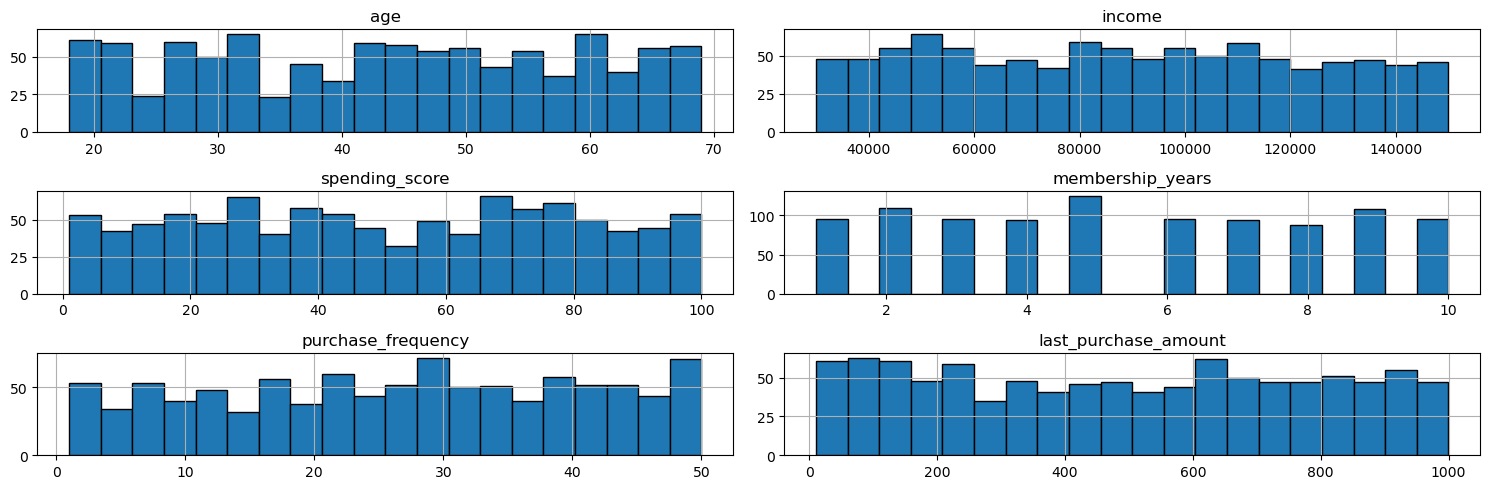

In [43]:
numeric_cols = ['age', 'income', 'spending_score', 'membership_years', 'purchase_frequency', 'last_purchase_amount']

df2[numeric_cols].hist(bins=20, figsize=(15, 5), edgecolor="black")
plt.tight_layout()
plt.show()

- No major skew or clustering in the numeric variables, meaning customers exhibit diverse behavior in terms of income, spending score, and purchase frequency. Can be segmented into different behavioral groups based on clustering analysis.

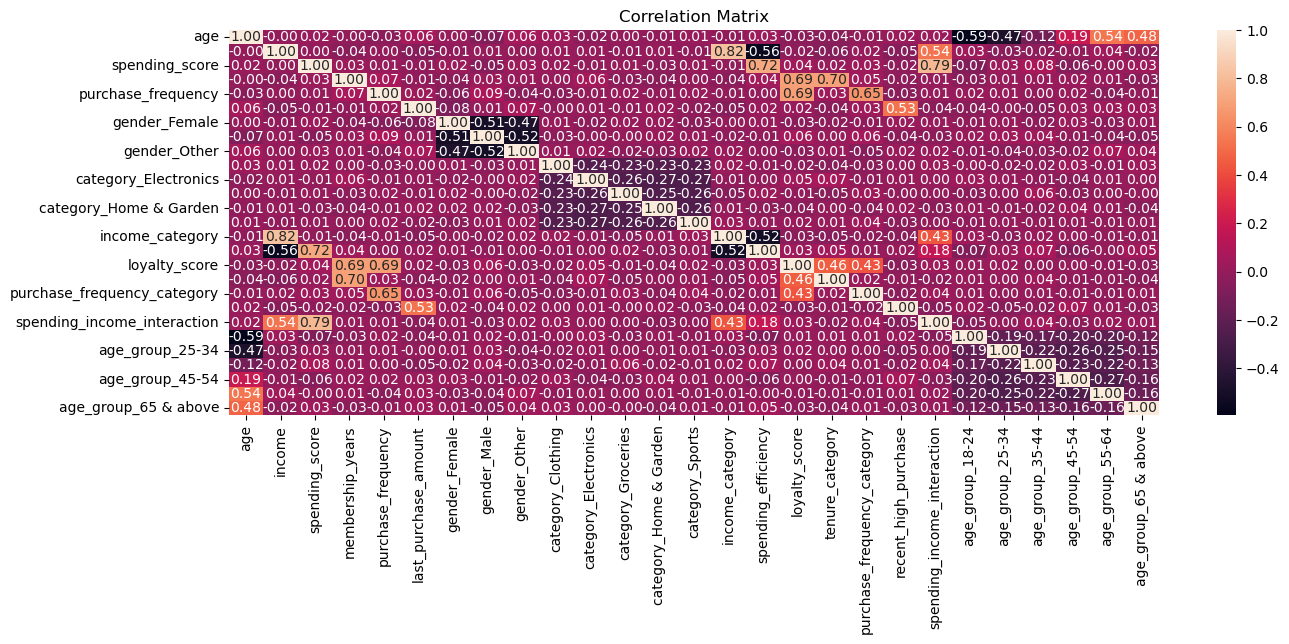

In [44]:
plt.figure(figsize=(15, 5))
sns.heatmap(df2.corr(), annot=True, fmt=".2f")
plt.title("Correlation Matrix")
plt.show()

- Loyalty Score & Purchase Frequency (0.72): Customers with higher loyalty scores tend to make more frequent purchases.
- Purchase Frequency & Spending Efficiency (0.65): Customers who purchase more frequently seem to have higher spending efficiency.
- Loyalty Score & Spending Efficiency (0.69): Loyal customers appear to have a strong positive relationship with how efficiently they spend, which could indicate that loyal customers spend strategically.
- Spending Efficiency & Age (-0.59): As age increases, spending efficiency tends to decrease, which might suggest older customers spend less efficiently compared to younger ones.
- Purchase Frequency & Age (-0.12): Slightly negative, indicating that older customers may make purchases less frequently.

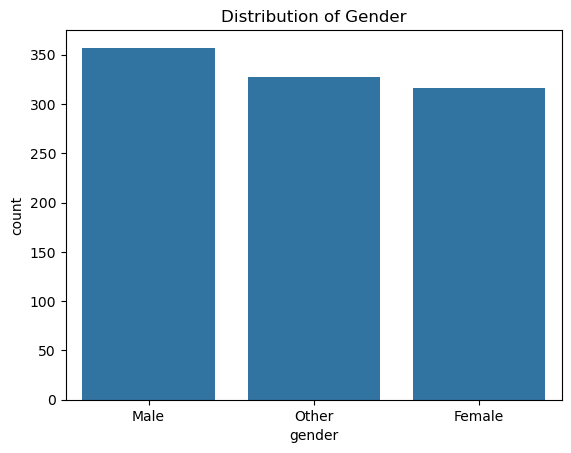

In [45]:
sns.countplot(data=df, x="gender", order=df["gender"].value_counts().index)
plt.title("Distribution of Gender")
plt.show()

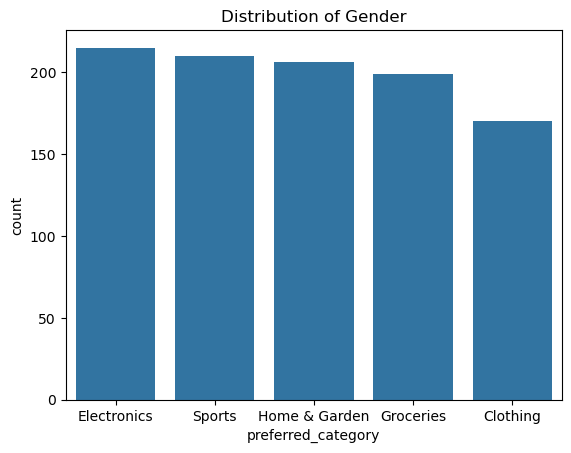

In [46]:
sns.countplot(data=df, x="preferred_category", order=df["preferred_category"].value_counts().index)
plt.title("Distribution of Gender")
plt.show()

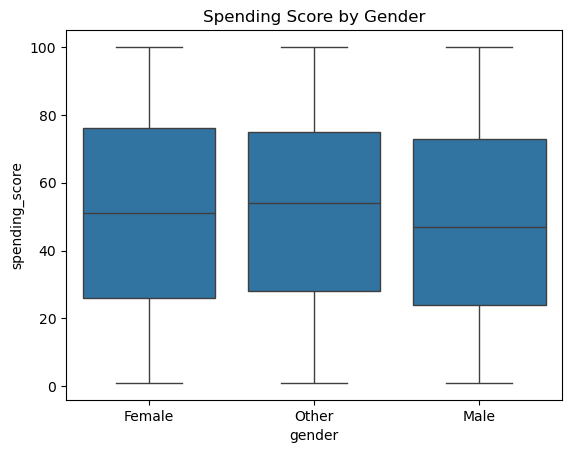

In [47]:
sns.boxplot(data=df, x="gender", y="spending_score")
plt.title("Spending Score by Gender")
plt.show()

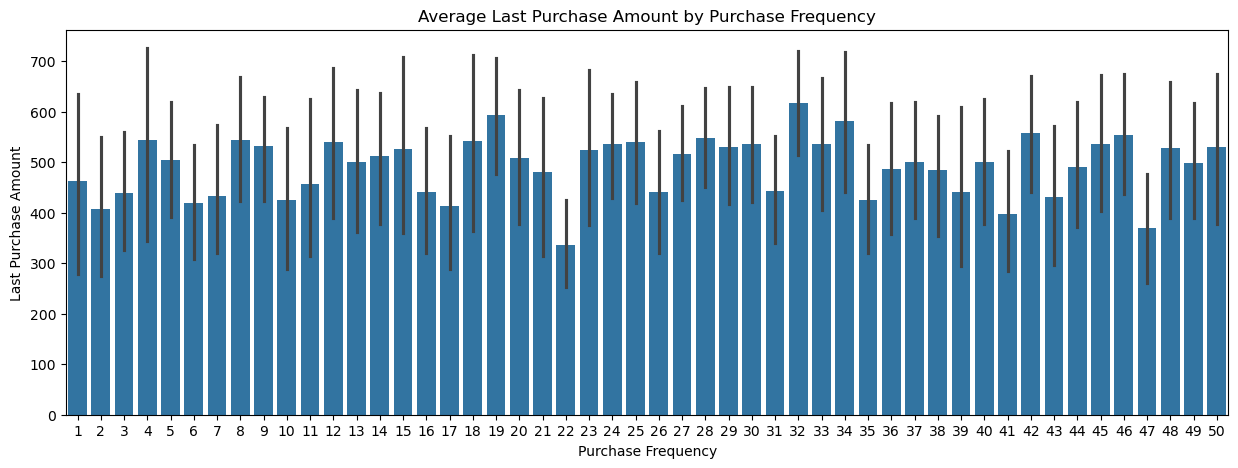

In [48]:
# Barplot of Average Spending

plt.figure(figsize=(15, 5))
sns.barplot(x="purchase_frequency",	y="last_purchase_amount", data=df2)
plt.title("Average Last Purchase Amount by Purchase Frequency")
plt.xlabel("Purchase Frequency")
plt.ylabel("Last Purchase Amount")
plt.show()

- Most of the average last purchase amounts seem to lie between 300 and 600, with a few exceptions that go slightly beyond that range.

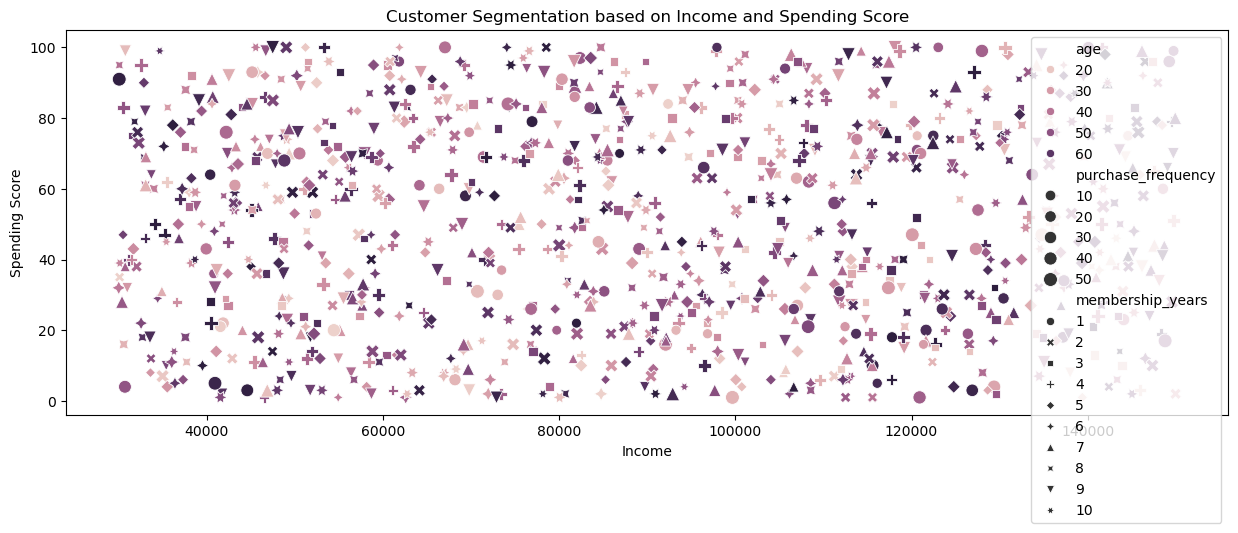

In [49]:
plt.figure(figsize=(15, 5))
sns.scatterplot(data=df2, x='income', y='spending_score', hue='age', style='membership_years', size='purchase_frequency', sizes=(50, 100))
plt.title('Customer Segmentation based on Income and Spending Score')
plt.xlabel('Income')
plt.ylabel('Spending Score')
plt.legend()
plt.show()

- The data points are quite spread out, and there doesn't seem to be a distinct correlation between income and spending score.

# Step 5: K-Means Clustering

### Step 5.1: Determine Optimal Number of Clusters

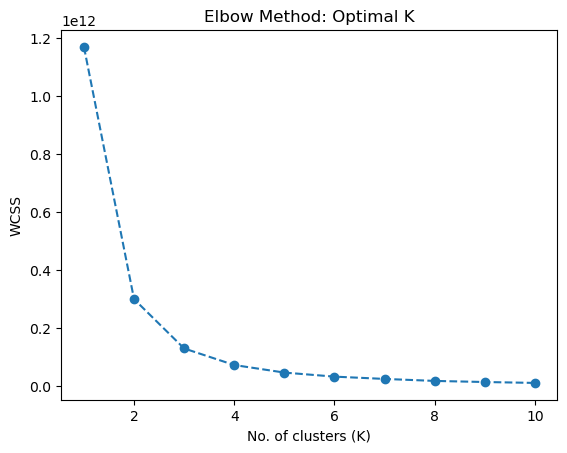

In [81]:
import matplotlib.pyplot as plt
from sklearn.cluster import KMeans as km

# Features to cluster
X = df2[["age", "income", "spending_score", "membership_years", "purchase_frequency", "last_purchase_amount"]].values

# WCSS (Within-Cluster Sum of Squares) is used to evaluate the compactness of the clusters formed. Lower WCSS values -> Tighter clusters, 
# (clusters are closer to their respective centroids).

wcss = []

for i in range(1, 11):
    kmeans = km(n_clusters=i, init="k-means++", random_state=42) 
    # init="k-means++": initial centroids are chosen in smart way to speed up convergence.
    kmeans.fit(X)
    wcss.append(kmeans.inertia_)

plt.plot(range(1, 11), wcss, marker="o", linestyle="--")
plt.title("Elbow Method: Optimal K")
plt.xlabel("No. of clusters (K)")
plt.ylabel("WCSS")
plt.show()

- The "elbow" point in the plot suggests the optimal number of clusters, where adding more clusters yields diminishing returns in WCSS reduction.
- K=3 (approx) indicates a good balance between cluster compactness and the number of clusters.

In [54]:
# Quality of the clusters

from sklearn.metrics import silhouette_score as ss

optimal_k = 3
kmeans = km(n_clusters=optimal_k, init="k-means++", random_state=42)
kmeans_labels = kmeans.fit_predict(X)

silhouette_avg = ss(X, kmeans_labels)
silhouette_avg

0.5922480464311883

- The silhouette score is computed using the original dataset X and the labels assigned to each data point by the K-Means algorithm. The silhouette score ranges from -1 to 1, where:

1. A score close to 1 indicates that the data points are well clustered.
2. A score around 0 indicates that the data points are on or very close to the decision boundary between two neighboring clusters.
3. A score less than 0 indicates that the data points may have been assigned to the wrong cluster.

### Step 5.2: Implement K-Means Clustering

In [66]:
# Scaling data before implementing K-Means Clustering

from sklearn.preprocessing import StandardScaler as ss

X = df2[["age", "income", "spending_score", "membership_years", "purchase_frequency", "last_purchase_amount"]]

s = ss()
X_scaled = s.fit_transform(X)

In [58]:
kmeans = km(n_clusters=3, init="k-means++", random_state=42)
kmeans.fit(X_scaled)

df2["Cluster"] = kmeans.labels_
df2[:1]

,age,income,spending_score,membership_years,purchase_frequency,last_purchase_amount,gender_Female,gender_Male,gender_Other,category_Clothing,...,purchase_frequency_category,recent_high_purchase,spending_income_interaction,age_group_18-24,age_group_25-34,age_group_35-44,age_group_45-54,age_group_55-64,age_group_65 & above,Cluster
0,38,99342,90,3,24,113.53,True,False,False,False,...,2,1,8940780,False,False,True,False,False,False,1


In [59]:
cluster_summary = df2.groupby("Cluster").mean()
cluster_summary

,age,income,spending_score,membership_years,purchase_frequency,last_purchase_amount,gender_Female,gender_Male,gender_Other,category_Clothing,...,tenure_category,purchase_frequency_category,recent_high_purchase,spending_income_interaction,age_group_18-24,age_group_25-34,age_group_35-44,age_group_45-54,age_group_55-64,age_group_65 & above
Cluster,,,,,,,,,,,,,,,,,,,,,
0,46.801802,54764.969970,50.756757,5.774775,26.477477,637.475225,0.279279,0.366366,0.354354,0.162162,...,0.831832,1.771772,0.987988,2.776767e+06,0.081081,0.171171,0.162162,0.231231,0.231231,0.123123
1,41.088608,96977.481013,48.111392,5.134177,24.243038,208.395772,0.369620,0.339241,0.291139,0.182278,...,0.779747,1.693671,0.724051,4.639821e+06,0.182278,0.212658,0.174684,0.197468,0.172152,0.060759
2,44.000000,117492.500000,54.334559,5.580882,30.158088,727.033419,0.283088,0.371324,0.345588,0.161765,...,0.775735,1.882353,1.000000,6.354007e+06,0.117647,0.213235,0.139706,0.231618,0.220588,0.077206


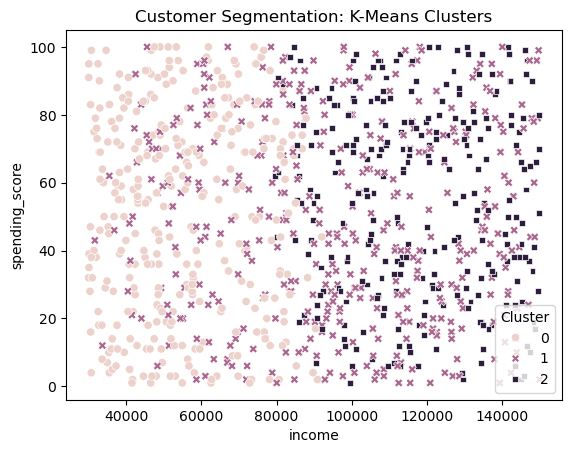

In [60]:
sns.scatterplot(data=df2, x="income", y="spending_score", hue="Cluster", style="Cluster")
plt.title('Customer Segmentation: K-Means Clusters')
plt.show()

- Cluster 0: Customers with lower income (mostly below 70,000) and a wide range of spending scores, spanning from around 0 to 100. Customers in this group are likely those with lower purchasing power but varied spending behavior.

- Cluster 1: Customers across all income levels (from low to high), but they tend to have moderate to low spending scores.
These customers may have higher incomes but are cautious with their spending, indicating a conservative spending pattern.

- Cluster 2: Customers with higher incomes (above 80,000) and moderate to high spending scores. These customers are high-value, likely frequent spenders who have more purchasing power and engage heavily with the business.

- Overlap between Cluster 1 and 2 in terms of spending score, especially for customers with moderate incomes (~60,000 to 100,000). This indicates some ambiguity in customer behavior in this income range.

# Step 6: Analyze and Interpret Clusters

In [85]:
cluster_labels = {0: "Big Spenders", 1: "Ocassional Spenders", 2: "Moderate Spenders"}

df2["Cluster_Label"] = df2["Cluster"].map(cluster_labels)
df2[:1]

,age,income,spending_score,membership_years,purchase_frequency,last_purchase_amount,gender_Female,gender_Male,gender_Other,category_Clothing,...,recent_high_purchase,spending_income_interaction,age_group_18-24,age_group_25-34,age_group_35-44,age_group_45-54,age_group_55-64,age_group_65 & above,Cluster,Cluster_Label
0,38,99342,90,3,24,113.53,True,False,False,False,...,1,8940780,False,False,True,False,False,False,1,Ocassional Spenders


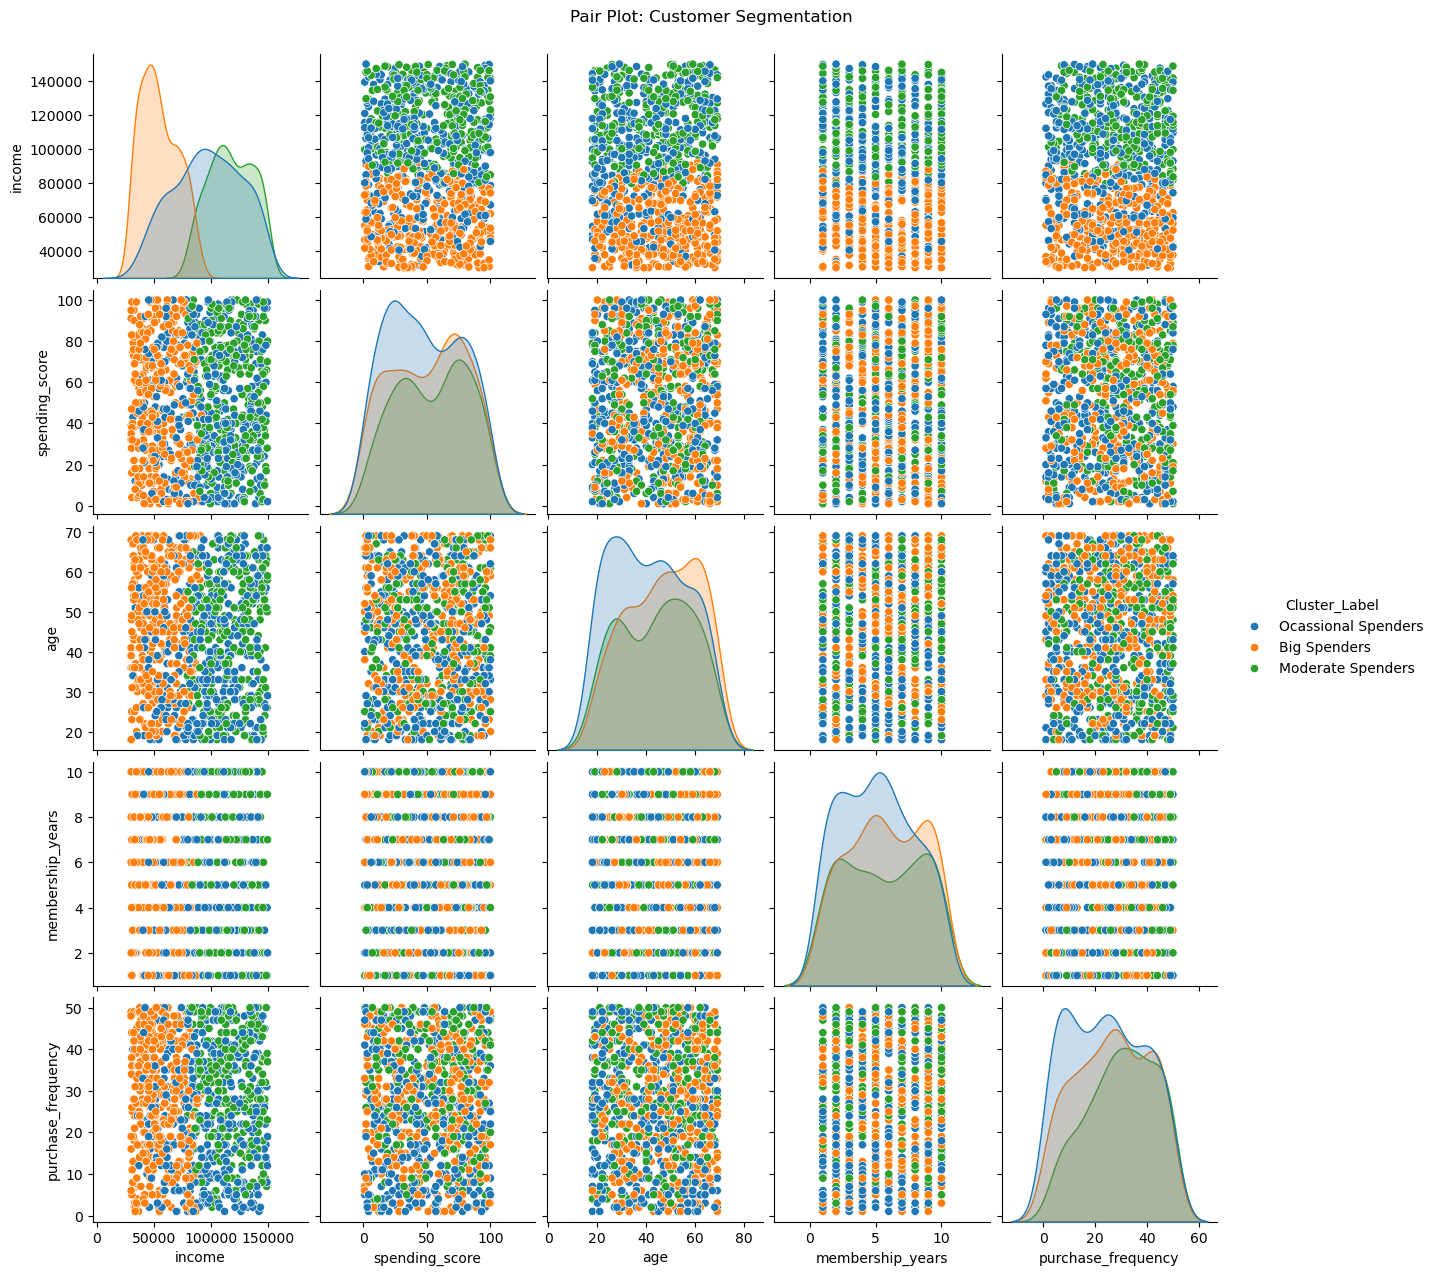

In [87]:
sns.pairplot(df2, hue="Cluster_Label", vars=["income", "spending_score", "age", "membership_years", "purchase_frequency"])
plt.suptitle('Pair Plot: Customer Segmentation', y=1.02)
plt.show()

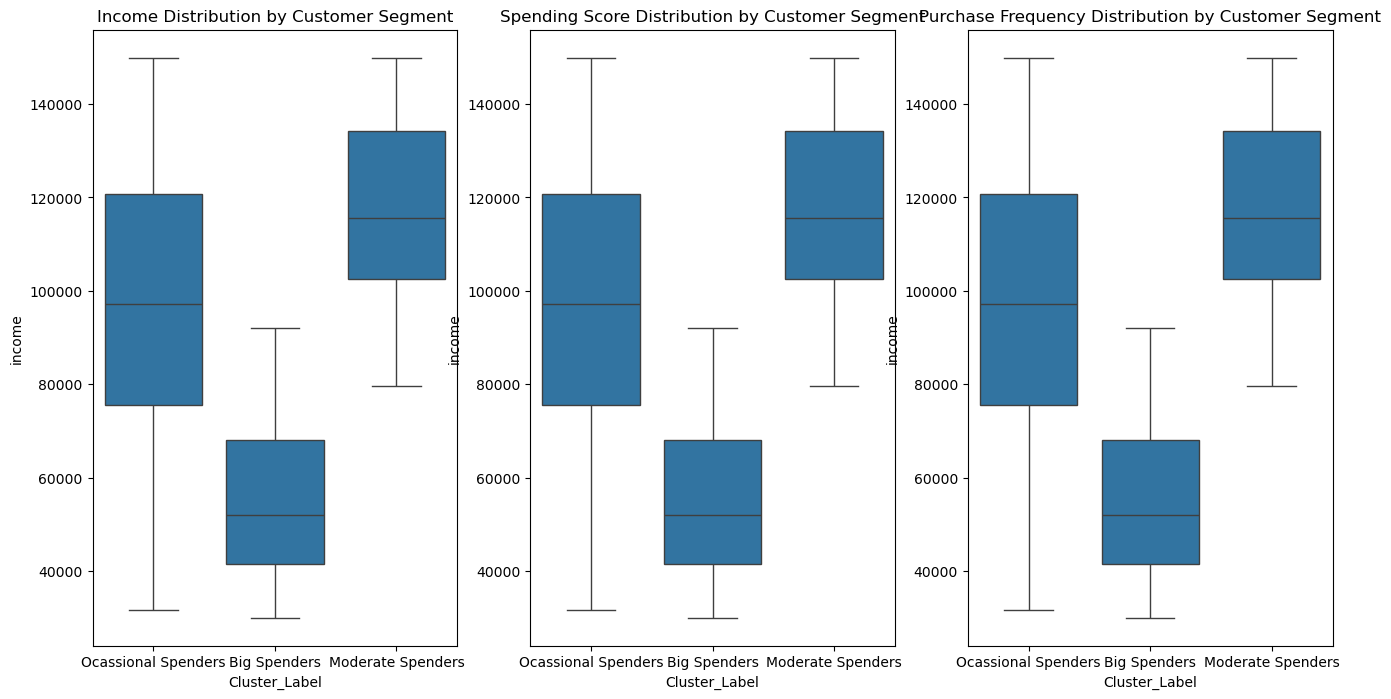

In [88]:
plt.figure(figsize=(16, 8))

plt.subplot(1, 3, 1)
sns.boxplot(x="Cluster_Label", y="income", data=df2)
plt.title('Income Distribution by Customer Segment')

plt.subplot(1, 3, 2)
sns.boxplot(x="Cluster_Label", y="income", data=df2)
plt.title('Spending Score Distribution by Customer Segment')

plt.subplot(1, 3, 3)
sns.boxplot(x="Cluster_Label", y="income", data=df2)
plt.title('Purchase Frequency Distribution by Customer Segment')

plt.show()

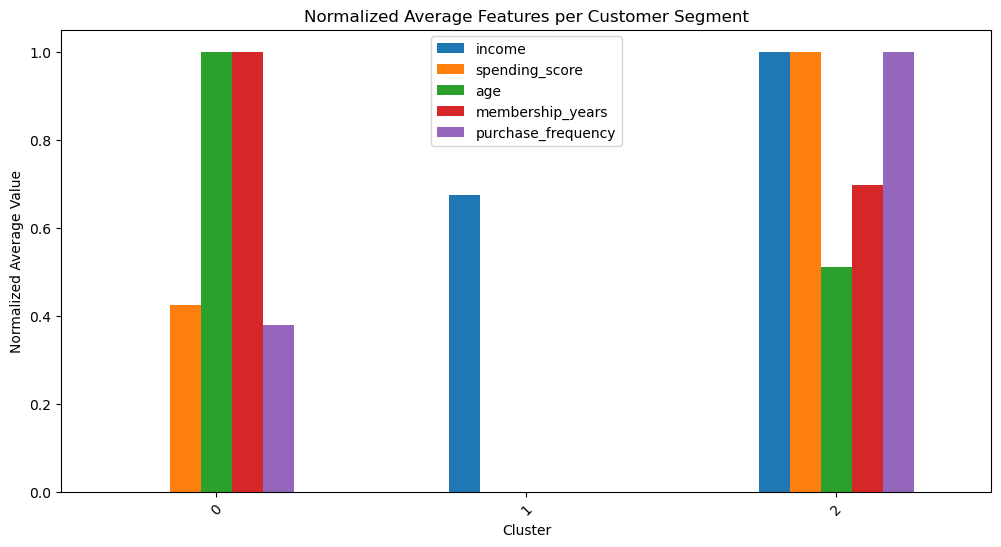

In [89]:
from sklearn.preprocessing import MinMaxScaler as mms

scaler = mms()

cluster_means_normalized = pd.DataFrame(scaler.fit_transform(cluster_summary), 
                                        columns=cluster_summary.columns, 
                                        index=cluster_summary.index)

cluster_means_normalized[['income', 'spending_score', 'age', 'membership_years', 'purchase_frequency']].plot(kind='bar', figsize=(12, 6))
plt.title('Normalized Average Features per Customer Segment')
plt.ylabel('Normalized Average Value')
plt.xticks(rotation=45)
plt.show()

### Business Insights from Customer Segmentation Analysis

1. Tailored Marketing Strategies:

- Big Spenders: Focus on high-value promotions and exclusive offers to maintain loyalty. Consider loyalty programs or rewards that cater to their preferences to further enhance their engagement.
- Occasional Spenders: Implement targeted marketing campaigns to convert these customers into regular purchasers. Promotional discounts or bundled offers might entice them to spend more frequently.
- Moderate Spenders: Create content or campaigns that encourage upgrades in spending behavior, perhaps through loyalty incentives or highlighting premium products.

2. Product Category Focus: Since the purchase frequency shows weak correlation with category preferences, consider diversifying product offerings to cater to varying interests across customer segments.

3. Age-Related Strategies:

- Younger Customers: Leverage social media and digital marketing channels to reach younger segments, focusing on trends and lifestyle.
- Older Customers: Highlight value and practicality in marketing to older age groups, as they tend to spend less efficiently. Offer customer support and educational content to improve their shopping experience.

4. Enhancing Spending Efficiency: Offer educational resources (e.g., webinars or guides) that teach customers how to maximize their spending efficiency, especially for those in the older demographic. This can improve customer satisfaction and retention.

5. Loyalty Programs: Develop loyalty programs that reward frequent purchases, especially targeting those identified as having a high loyalty score. Providing them with personalized experiences could further enhance their spending.